In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
df = pd.read_csv('dataset/dataset.csv')

rainfall_classification = []

for i in df['rainfall']:
    if(i==0):
        rainfall_classification.append(0)
    elif(i>0 and i<2.5):
        rainfall_classification.append(1)
    elif(i>=2.5 and i<7.5):
        rainfall_classification.append(2)
    elif(i>=7.5 and i<35.5):
        rainfall_classification.append(3)
    elif(i>=35.5 and i<64.4):
        rainfall_classification.append(4)
    elif(i>=64.4 and i<124.4):
        rainfall_classification.append(5)
    else:
        rainfall_classification.append(6)

df['rainfall_classification'] = rainfall_classification
df.head(10)

,year,month,date,temperature,specific humidity,relative humidity,surface pressure,wind speed,wind direction,rainfall,rainfall_classification
0,2001,1,1,25.67,15.44,74.88,99.12,2.03,291.56,0.05,1
1,2001,1,2,25.20,14.40,72.69,99.19,2.35,222.31,0.02,1
2,2001,1,3,25.59,14.59,71.69,99.23,2.12,214.25,0.00,0
3,2001,1,4,26.68,14.89,68.88,99.23,1.77,207.75,0.04,1
4,2001,1,5,26.78,14.53,67.12,99.26,1.69,190.69,0.02,1
5,2001,1,6,26.33,13.92,66.06,99.29,1.66,181.25,0.10,1
6,2001,1,7,25.20,11.60,59.56,99.22,2.17,181.94,0.00,0
7,2001,1,8,25.29,10.86,55.81,99.15,2.40,180.62,0.00,0
8,2001,1,9,25.56,12.02,59.50,99.21,2.37,166.69,0.00,0
9,2001,1,10,26.37,13.61,63.81,99.25,1.91,208.25,0.00,0


In [22]:
X = df[['date', 'month', 'year', 'temperature', 'specific humidity', 'relative humidity', 'surface pressure', 'wind speed', 'wind direction']]
y = df['rainfall_classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5916, 9) (5916,)
(1479, 9) (1479,)


In [23]:
series1 = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(5916, 9, 1)
(1479, 9, 1)


### CNN

In [35]:
model = Sequential()

model.add(Conv1D(filters=4, kernel_size=2, input_shape=(9,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Add ModelCheckpoint callback to save the weights at the epoch with best validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

history = model.fit(series1, y_train, epochs=1000, batch_size= 200, validation_data=(series2, y_test), 
          callbacks=[EarlyStopping(monitor='val_loss', patience=10), checkpoint], verbose=1, shuffle=False)

# Load the weights of the best model and evaluate its accuracy on the validation set
model.load_weights('best_model.h5')
_, max_accuracy = model.evaluate(series2, y_test, verbose=0)

Epoch 1/1000
30/30 [==============================] - 0s 13ms/step - loss: 14.4888 - accuracy: 0.3778 - val_loss: 10.0070 - val_accuracy: 0.3908
Epoch 2/1000
30/30 [==============================] - 0s 4ms/step - loss: 8.8211 - accuracy: 0.3827 - val_loss: 7.6172 - val_accuracy: 0.3935
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 6.7710 - accuracy: 0.3873 - val_loss: 5.9400 - val_accuracy: 0.3895
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 5.1286 - accuracy: 0.3895 - val_loss: 4.5698 - val_accuracy: 0.3827
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 3.9504 - accuracy: 0.3922 - val_loss: 3.5860 - val_accuracy: 0.3908
Epoch 6/1000
30/30 [==============================] - 0s 5ms/step - loss: 3.1387 - accuracy: 0.3908 - val_loss: 2.8998 - val_accuracy: 0.3942
Epoch 7/1000
30/30 [==============================] - 0s 2ms/step - loss: 2.5907 - accuracy: 0.3874 - val_loss: 2.3823 - val_accuracy: 0.3908
Epo

In [36]:
print(f"Maximum validation accuracy achieved: {max_accuracy}")
model.summary()

Maximum validation accuracy achieved: 0.44557133316993713
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 8, 4)              12        
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 4, 4)              0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 51        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


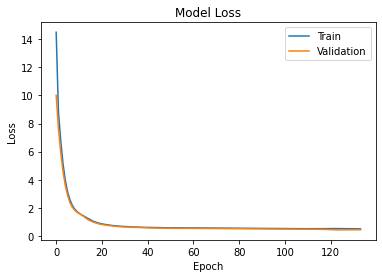

In [37]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

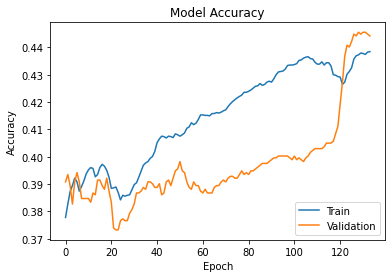

In [38]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()